In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Dritte Datensatz:  PO_TSI

## Datenvisualisierung:

In [53]:
#  PO_TSI Datei einlesen:
PO_TSI = pd.read_csv("C:/Users/admin/Desktop/PO/online_dataset_PO_TSI_o2.csv")
PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,holiday,release_type,is_release,is_incident
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1.0,Neujahr,NaN,NaN,NaN
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-07,PO,Telesales,TSI,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-09,PO,Telesales,TSI,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-13,PO,Telesales,TSI,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
PO_TSI.shape

(489, 14)

In [55]:
PO_TSI = PO_TSI.sort_values(by='date')
PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,holiday,release_type,is_release,is_incident
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1.0,Neujahr,NaN,NaN,NaN
311,2022-01-03,PO,Telesales,TSI,407,2022-01-03,2022-01-03,Einschränkung,1.0,NaN,NaN,NaN,NaN,1.0
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,2022-01-05,PO,Telesales,TSI,370,2022-01-05,2022-01-05,Einschränkung,1.0,NaN,NaN,NaN,NaN,1.0
391,2022-01-06,PO,Telesales,TSI,271,2022-01-06,2022-01-06,Ausfall,2.0,NaN,NaN,NaN,NaN,1.0


In [56]:
# Anzahl die ["incident_hours"]:
sales_sum = PO_TSI["sales"].sum()

print(sales_sum)

130417


In [57]:
PO_TSI["sales"].describe()

count    489.000000
mean     266.701431
std      140.038786
min        1.000000
25%      157.000000
50%      312.000000
75%      366.000000
max      530.000000
Name: sales, dtype: float64

Text(0, 0.5, 'Sales')

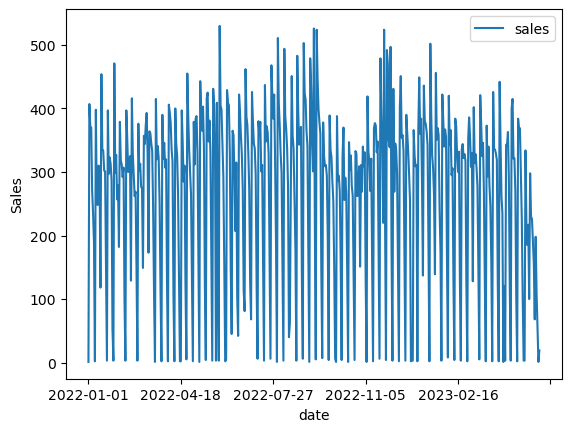

In [58]:
fig, ax = plt.subplots() # Create the figure and axes object
# Plot the first x and y axes:
PO_TSI.plot(x = 'date', y = 'sales', ax = ax) 
plt.ylabel('Sales')

In [59]:
frq=PO_TSI["is_incident"].value_counts(dropna=False)
frq

1.0    324
NaN    165
Name: is_incident, dtype: int64

In [60]:
# Replace NaN values with 0
PO_TSI["is_incident"].fillna(0, inplace=True)

# Convert the values to integers, removing decimals
PO_TSI["is_incident"] = PO_TSI["is_incident"].astype(int)

# Now you can check the value counts again
frq = PO_TSI["is_incident"].value_counts(dropna=False)
print(frq)

1    324
0    165
Name: is_incident, dtype: int64


In [61]:
#Change to datetime:
PO_TSI["date"]= pd.to_datetime(PO_TSI["date"])

# Konvertieren Sie die Spalte "date" in das gewünschte Monat-Jahr-Format und speichern Sie sie in einer neuen Spalte "Monat"
PO_TSI['Monat'] = pd.to_datetime(PO_TSI['date']).dt.to_period('M')

PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,holiday,release_type,is_release,is_incident,Monat
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1.0,Neujahr,NaN,NaN,0,2022-01
311,2022-01-03,PO,Telesales,TSI,407,2022-01-03,2022-01-03,Einschränkung,1.0,NaN,NaN,NaN,NaN,1,2022-01
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01
312,2022-01-05,PO,Telesales,TSI,370,2022-01-05,2022-01-05,Einschränkung,1.0,NaN,NaN,NaN,NaN,1,2022-01
391,2022-01-06,PO,Telesales,TSI,271,2022-01-06,2022-01-06,Ausfall,2.0,NaN,NaN,NaN,NaN,1,2022-01


In [62]:
# Replace NaN values with 0
PO_TSI["is_holiday"].fillna(0, inplace=True)

# Convert the values to integers, removing decimals
PO_TSI["is_holiday"] = PO_TSI["is_holiday"].astype(int)

# Now you can check the value counts again
frq = PO_TSI["is_holiday"].value_counts(dropna=False)
print(frq)

0    477
1     12
Name: is_holiday, dtype: int64


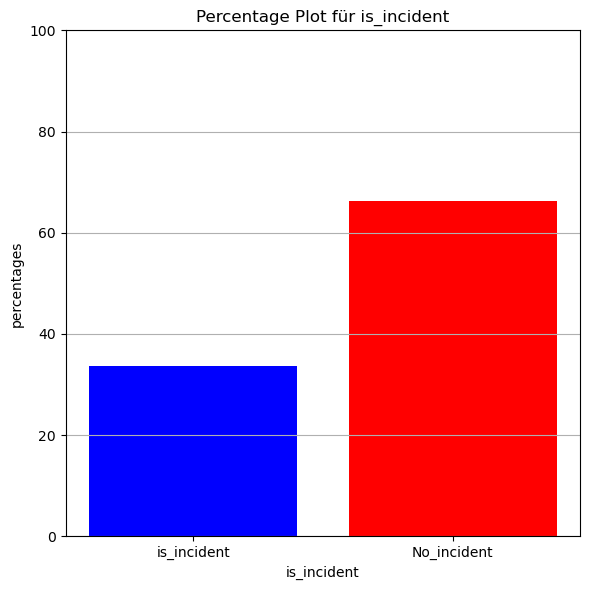

In [63]:
# Zählen Sie die Anzahl der 0 und 1 in der 'binary_var'-Spalte
is_incident_counts = PO_TSI['is_incident'].value_counts()

# Berechnen Sie die Prozentsätze
total_samples = len(PO_TSI)
percentages = is_incident_counts / total_samples * 100
colors = ['red', 'blue']
# Erstellen Sie den Plot
plt.figure(figsize=(6, 6))
plt.bar(percentages.index, percentages.values, color = colors)
plt.xlabel('is_incident')
plt.ylabel('percentages')
plt.title('Percentage Plot für is_incident')
plt.xticks(percentages.index, labels=['No_incident', 'is_incident'])
plt.ylim(0, 100)  # Stellen Sie die y-Achse auf 0 bis 100 ein
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [64]:
PO_TSI.shape

(489, 15)

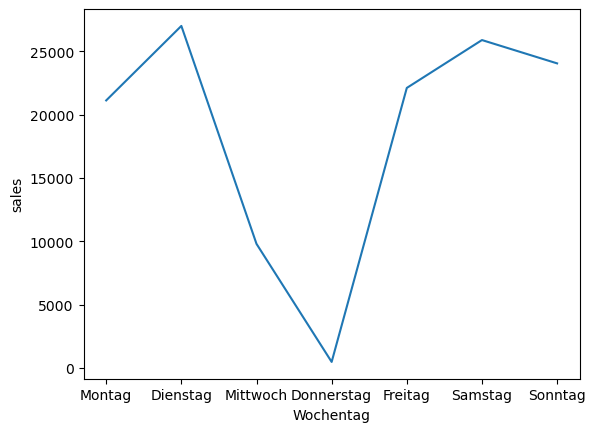

In [65]:
# Extrahiere die Wochentage für jede Zeile in der "Datum"-Spalte
PO_TSI['Wochentag'] = PO_TSI['date'].dt.day_name()

# Gruppieren Sie die Daten nach 'Wochentag' und berechnen Sie die Summe der Verkäufe für jeden Wochentag
Wochentag_group = PO_TSI.groupby('Wochentag')
sales = Wochentag_group['sales'].sum()
Wochentags = [Wochentag for Wochentag, _ in Wochentag_group]

# Plot der Daten
plt.plot(Wochentags, sales)
plt.ylabel('sales')
plt.xlabel('Wochentag')
#plt.xticks(rotation='vertical', size=8)

# Hinzufügen der Wochentagsnamen als X-Achsenbeschriftungen
wochentag_names = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
plt.xticks(Wochentags, wochentag_names)

plt.show()

In [66]:
# Convert the "Monat" to datetime data type if it's not already
PO_TSI['Monat'] = PO_TSI['Monat'].dt.to_timestamp()

PO_TSI['Monat'] = pd.to_datetime(PO_TSI['Monat'])

# Use dt.month to extract the month number and categorize based on month number (1 to 12)
PO_TSI['Month_k'] = PO_TSI['Monat'].dt.month

# Print the DataFrame with the new "Month_k" column
PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,holiday,release_type,is_release,is_incident,Monat,Wochentag,Month_k
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1,Neujahr,NaN,NaN,0,2022-01-01,Saturday,1
311,2022-01-03,PO,Telesales,TSI,407,2022-01-03,2022-01-03,Einschränkung,1.0,0,NaN,NaN,NaN,1,2022-01-01,Monday,1
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2022-01-01,Tuesday,1
312,2022-01-05,PO,Telesales,TSI,370,2022-01-05,2022-01-05,Einschränkung,1.0,0,NaN,NaN,NaN,1,2022-01-01,Wednesday,1
391,2022-01-06,PO,Telesales,TSI,271,2022-01-06,2022-01-06,Ausfall,2.0,0,NaN,NaN,NaN,1,2022-01-01,Thursday,1


In [67]:
frq= PO_TSI['Month_k'].value_counts(dropna=False)
frq

3     59
4     58
1     57
2     54
5     48
7     31
8     31
12    31
6     30
9     30
10    30
11    30
Name: Month_k, dtype: int64

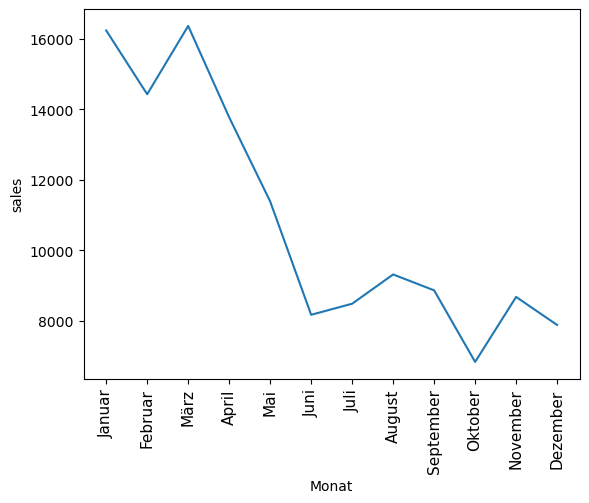

In [68]:
def get_month_name(month_num):
    months = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']
    return months[month_num - 1]  # Monatsnummern sind 1-basiert, daher müssen wir 1 abziehen

Monat_group = PO_TSI.groupby('Month_k')
sales = Monat_group['sales'].sum()
Monats = [get_month_name(month_num) for month_num in sales.index]

plt.plot(Monats, sales)
plt.ylabel('sales')
plt.xlabel('Monat')
plt.xticks(rotation='vertical', size=11)
plt.show()

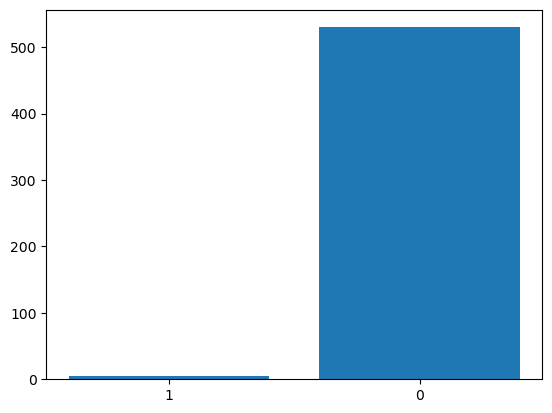

In [69]:
PO_TSI['is_holiday'] = PO_TSI['is_holiday'].astype(str)

plt.bar(PO_TSI['is_holiday'],PO_TSI['sales'])
plt.show()

In [70]:
PO_TSI.shape

(489, 17)

In [71]:
# Erstellen Sie die Dummy-Variablen für "is_holiday"
holiday_dummies = pd.get_dummies(PO_TSI['is_holiday'], prefix='Holiday', drop_first=True)

# Erstellen Sie die Dummy-Variablen für "is_incident"
incident_dummies = pd.get_dummies(PO_TSI['is_incident'], prefix='Incident', drop_first=True)

# Erstellen Sie die Dummy-Variablen für "Wochentag"
weekday_dummies = pd.get_dummies(PO_TSI['Wochentag'], prefix='Weekdays', drop_first=True)

# Erstellen Sie die Dummy-Variablen für "Month_k"
month_dummies = pd.get_dummies(PO_TSI['Month_k'], prefix='Month', drop_first=True)

# Fügen Sie die Dummy-Variablen dem DataFrame hinzu
PO_TSI = pd.concat([PO_TSI, holiday_dummies, incident_dummies, weekday_dummies, month_dummies], axis=1)

PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
311,2022-01-03,PO,Telesales,TSI,407,2022-01-03,2022-01-03,Einschränkung,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
312,2022-01-05,PO,Telesales,TSI,370,2022-01-05,2022-01-05,Einschränkung,1.0,0,...,0,0,0,0,0,0,0,0,0,0
391,2022-01-06,PO,Telesales,TSI,271,2022-01-06,2022-01-06,Ausfall,2.0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
PO_TSI.columns

Index(['date', 'product_category', 'reseller_name', 'reseller', 'sales',
       'incident_start_date', 'incident_end_date', 'incident_type',
       'incident_days', 'is_holiday', 'holiday', 'release_type', 'is_release',
       'is_incident', 'Monat', 'Wochentag', 'Month_k', 'Holiday_1',
       'Incident_1', 'Weekdays_Monday', 'Weekdays_Saturday', 'Weekdays_Sunday',
       'Weekdays_Thursday', 'Weekdays_Tuesday', 'Weekdays_Wednesday',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [73]:
# Daten PO_TSI speichern:
PO_TSI.to_csv("PO_TSI.csv", index = None)

In [74]:
# Daten PO_TSI einlesen:
PO_TSI=pd.read_csv("PO_TSI.csv")
PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-03,PO,Telesales,TSI,407,2022-01-03,2022-01-03,Einschränkung,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-01-05,PO,Telesales,TSI,370,2022-01-05,2022-01-05,Einschränkung,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-01-06,PO,Telesales,TSI,271,2022-01-06,2022-01-06,Ausfall,2.0,0,...,0,0,0,0,0,0,0,0,0,0


# Regression: 

In [75]:
# Definiere die unabhängigen Variablen (X) und die abhängige Variable (y)
X = PO_TSI[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Sunday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  
y = PO_TSI['sales']

# Füge eine Konstante hinzu, um den Intercept zu berücksichtigen
X = sm.add_constant(X)

# Erstelle und fitte das Regressionsmodell
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     144.2
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          5.55e-182
Time:                        16:07:20   Log-Likelihood:                -2639.8
No. Observations:                 489   AIC:                             5320.
Df Residuals:                     469   BIC:                             5404.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                310.3956     10

In [76]:
# Make forecasts using the model
forecasts = model.predict(X)

# Add the forecasts as a new column to the original DataFrame 'PO_TSI'
PO_TSI['sales_forecast_Regression'] = forecasts
PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,sales_forecast_Regression
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,-131.389869
1,2022-01-03,PO,Telesales,TSI,407,2022-01-03,2022-01-03,Einschränkung,1.0,0,...,0,0,0,0,0,0,0,0,0,404.220988
2,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,368.915757
3,2022-01-05,PO,Telesales,TSI,370,2022-01-05,2022-01-05,Einschränkung,1.0,0,...,0,0,0,0,0,0,0,0,0,339.254445
4,2022-01-06,PO,Telesales,TSI,271,2022-01-06,2022-01-06,Ausfall,2.0,0,...,0,0,0,0,0,0,0,0,0,320.433274


In [77]:
# Change all values less than 0 to 0 
PO_TSI['sales_forecast_Regression'] = PO_TSI['sales_forecast_Regression'].apply(lambda x: max(x, 0))

<AxesSubplot:>

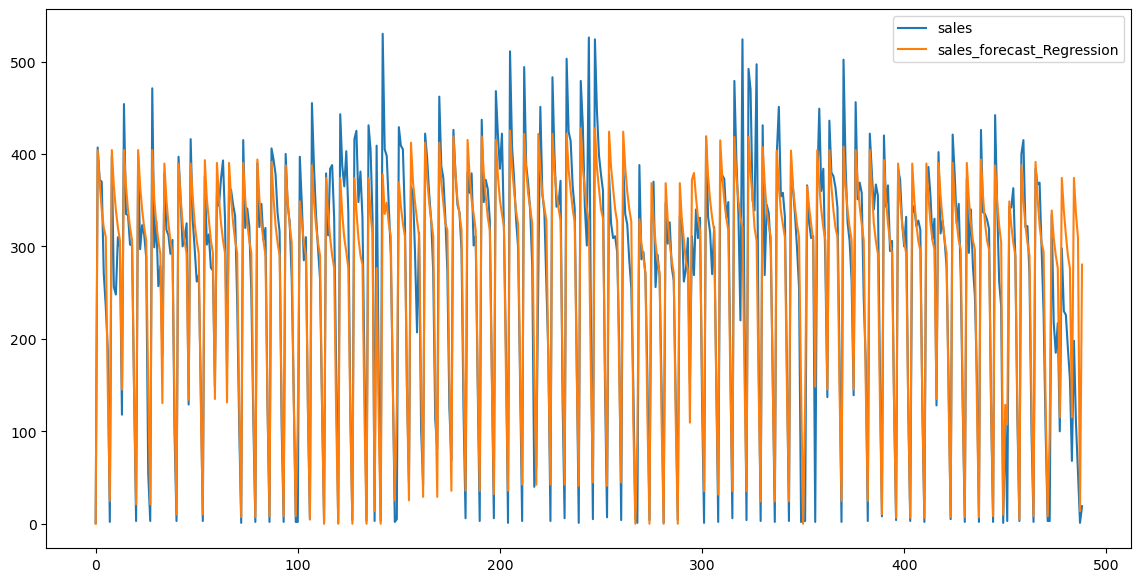

In [78]:
PO_TSI[["sales", "sales_forecast_Regression"]].plot(figsize=(14, 7))

# ARIMAX:

In [79]:
exog= PO_TSI[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Sunday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  
endog= PO_TSI['sales']

# Create the ARIMA model with AR order = 1 and MA order = 0 and provide exogenous variables
order = (1, 0, 0)  # AR order = 1, MA order = 0
model = sm.tsa.ARIMA(endog, exog, order=order)

# Fit the model to the data
results = model.fit()

# Display the results
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  489
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2629.534
Date:                Thu, 27 Jul 2023   AIC                           5303.068
Time:                        16:09:03   BIC                           5395.300
Sample:                             0   HQIC                          5339.294
                                - 489                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                310.4765     12.392     25.054      0.000     286.188     334.765
Holiday_1           -274.9588      9.339    -29.443      0.000    -293.262    -256.656
Incident_1          

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Prognose:

In [80]:
# Define the exogenous features for forecasting
exogenous_features= PO_TSI[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Sunday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  

# Generate the forecast for the entire data period
forecast = results.predict(exog=exogenous_features)

# Add the forecasted values to the DataFrame
PO_TSI["Forecast_ARIMAX"] = forecast

# Print the DataFrame with the forecasted values
PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,sales_forecast_Regression,Forecast_ARIMAX
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0.000000,-125.971746
1,2022-01-03,PO,Telesales,TSI,407,2022-01-03,2022-01-03,Einschränkung,1.0,0,...,0,0,0,0,0,0,0,0,404.220988,431.748469
2,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,368.915757,369.075909
3,2022-01-05,PO,Telesales,TSI,370,2022-01-05,2022-01-05,Einschränkung,1.0,0,...,0,0,0,0,0,0,0,0,339.254445,340.984456
4,2022-01-06,PO,Telesales,TSI,271,2022-01-06,2022-01-06,Ausfall,2.0,0,...,0,0,0,0,0,0,0,0,320.433274,327.740710


In [81]:
# Change all values less than 0 to 0 
PO_TSI['Forecast_ARIMAX'] = PO_TSI['Forecast_ARIMAX'].apply(lambda x: max(x, 0))

<AxesSubplot:>

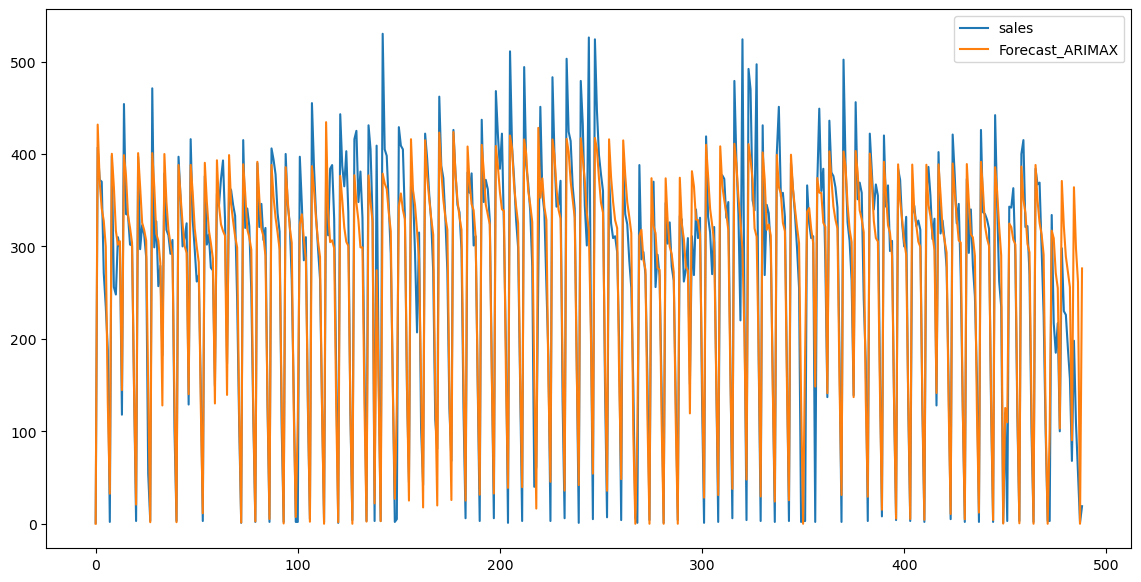

In [82]:
PO_TSI[["sales", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

## Opti-Arimax

In [83]:
# Replace 'sales' with the actual column name if different
data = PO_TSI['sales']

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                           order=comb,
                                           seasonal_order=combs,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
print(ans_df.loc[ans_df['aic'].idxmin()])

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6958.558775360944
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =6591.361805683334
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =6455.259014769266
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5949.462046999259
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =6405.139216223492
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =6104.555352599962
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =6199.379103638867
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =5940.22195759538
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =6632.956990339571
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =6397.019903204922
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =6424.951620174723
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =5909.853486923466
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =6350.486580508668
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =6066.2181680755275
ARIMA (0, 0, 1) x (1

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =6030.596866025173
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =6136.762584553349
ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =5898.051703339066
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =6396.424357177628
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =6191.020778177317
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =6685.100584868838
ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =6127.256089521306
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =6211.701534326639
ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =6187.846172273399
ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =6339.82884568977
ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =6097.323698435408
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =6175.4984808124345
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =5993.804965009212
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =6430.838627804187
ARIMA (1, 1, 1) x (0

In [86]:
import pandas as pd
import statsmodels.api as sm

# Assuming your dataset "PO_Port" has a column named "sales" representing the time series data
# Replace 'sales' with the actual column name if different
data = PO_TSI['sales']

# Define the exogenous variables (including the constant if needed)
exog_variables = PO_TSI[['Holiday_1', 'Incident_1', 'Weekdays_Monday', 'Weekdays_Saturday', 'Weekdays_Sunday', 'Weekdays_Thursday', 'Weekdays_Tuesday', 'Weekdays_Wednesday', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']]
exog_variables = sm.add_constant(exog_variables)  # If you need a constant term

# Create the SARIMAX model with AR order = 1, MA order = 0, and seasonal order = (0, 1, 1, 12)
order = (0,0, 1)  # AR order = 1, MA order = 0
seasonal_order = (1,1,1, 12)  # Seasonal order (P, D, Q, S) = (0, 1, 1, 12)
model = sm.tsa.SARIMAX(data, exog=exog_variables, order=order, seasonal_order=seasonal_order)

# Fit the model to the data
results = model.fit()

# Display the results
print(results.summary())

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                  489
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -2592.659
Date:                            Thu, 27 Jul 2023   AIC                           5233.318
Time:                                    16:13:22   BIC                           5333.339
Sample:                                         0   HQIC                          5272.645
                                            - 489                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0160   8759.447   1.83e-06      1.000   -1.72e+04    1.72e+04
Holiday_1  